In [8]:
#import liabraries
import string
import re
import codecs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [9]:
eng_df = pd.read_csv("Dataset/eng_news_2015_10K-sentences.txt","utf-8", header=None, names=["English"])
ger_df = pd.read_csv("Dataset/deu_mixed-typical_2011_10K-sentences.txt","utf-8", header=None, names=["German"])
fre_df = pd.read_csv("Dataset/fra_mixed_2009_10K-sentences.txt","utf-8", header=None, names=["French"])
spa_df = pd.read_csv("Dataset/spa_news_2011_10K-sentences.txt","utf-8", header=None, names=["Spanish"])

<ipython-input-9-70216dc1dc7c>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  eng_df = pd.read_csv("Dataset/eng_news_2015_10K-sentences.txt","utf-8", header=None, names=["English"])
<ipython-input-9-70216dc1dc7c>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ger_df = pd.read_csv("Dataset/deu_mixed-typical_2011_10K-sentences.txt","utf-8", header=None, names=["German"])
<ipython-input-9-70216dc1dc7c>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this 

In [10]:
print(eng_df.head)
print(ger_df.head)
print(fre_df.head)
print(spa_df.head)

<bound method NDFrame.head of                                                 English
0     1\t0:49 autoplay autoplay Copy this code to yo...
1     2\t08:35 GMT - Roadmap signed - The head of th...
2     3\t100 moments from the Iraq War 100 photos A ...
3     4\t10 a.m. From cyberspace to space itself, Re...
4     5\t11 hours Meet the Press With 16 Million in ...
...                                                 ...
9982  9983\tZelmer, who co-owns the company with Rob...
9983  9984\tZimba the cat needs a loving home Zimba ...
9984  9985\tZim-Fund came following approval by the ...
9985  9986\tZito outlasted his counterpart one batte...
9986  9987\tZombies aside, it's an amusing strategy ...

[9987 rows x 1 columns]>
<bound method NDFrame.head of                                                  German
0              1\t105 Millionen Euro werden investiert.
1     2\t1343 wurde der Zentralturm der Kathedrale e...
2     3\t1841 wurde die erste Lokomotive in München ...
3                 

In [11]:
#get punctuation
for char in string.punctuation:
    print(char, end=' ')
translate_table = dict((ord(char), None) for char in string.punctuation)

! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ 

In [12]:
data_eng = []
lang_eng = []
for i,line in eng_df.iterrows():
    line = line['English']
    if len(line) != 0:
        line = line.lower()
        line = re.sub(r"\d+","",line)
        line = line.translate(translate_table)
        data_eng.append(line)
        lang_eng.append("English")

In [13]:
data_ger = []
lang_ger = []
for i,line in ger_df.iterrows():
    line = line['German']
    if len(line) != 0:
        line = line.lower()
        line = re.sub(r"\d+","",line)
        line = line.translate(translate_table)
        data_ger.append(line)
        lang_ger.append("German")

In [14]:
data_fre = []
lang_fre = []
for i,line in fre_df.iterrows():
    line = line['French']
    if len(line) != 0:
        line = line.lower()
        line = re.sub(r"\d+","",line)
        line = line.translate(translate_table)
        data_fre.append(line)
        lang_fre.append("French")

In [15]:
data_spa = []
lang_spa = []
for i,line in spa_df.iterrows():
    line = line['Spanish']
    if len(line) != 0:
        line = line.lower()
        line = re.sub(r"\d+","",line)
        line = line.translate(translate_table)
        data_spa.append(line)
        lang_spa.append("Spanish")

In [16]:
df = pd.DataFrame({"Text":data_eng+data_ger+data_fre+data_spa,"Language":lang_eng+lang_ger+lang_fre+lang_spa})
df.head

<bound method NDFrame.head of                                                     Text Language
0      \t autoplay autoplay copy this code to your we...  English
1      \t gmt  roadmap signed  the head of the un ato...  English
2      \t moments from the iraq war  photos a boy sta...  English
3      \t am from cyberspace to space itself republic...  English
4      \t hours meet the press with  million in obama...  English
...                                                  ...      ...
39953  \t la enfermedad de aguirre no afectará a su c...  Spanish
39954      \tpascuas” ha quedado prácticamente en desuso  Spanish
39955         \tpero en el mundo real eso es lo de menos  Spanish
39956  \t el anciano de  años que se encontraba en pa...  Spanish
39957  \tla eclosión de los negocios de la distribuci...  Spanish

[39958 rows x 2 columns]>

In [24]:
X, y = df.iloc[:,0],df.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
# vectorizer and model fitting pipeline
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1,3), analyzer='char')
pipe_lr_r13 = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', linear_model.LogisticRegression())
])
# model fitting
pipe_lr_r13.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', LogisticRegression())])

In [26]:
#model prediction
y_predict = pipe_lr_r13.predict(X_test)
#model evaluation
acc = (metrics.accuracy_score(y_test, y_predict))*100
print("Accuracy: ",acc,"%")


Accuracy:  99.76226226226225 %


Confusion Matrix: 
 [[2000    0    5    1]
 [   0 1947    5    1]
 [   2    1 1994    0]
 [   1    1    2 2032]]


[Text(0, 0.5, 'English'),
 Text(0, 1.5, 'German'),
 Text(0, 2.5, 'French'),
 Text(0, 3.5, 'Spanish')]

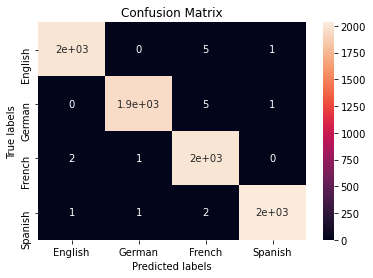

In [39]:
#confusion matrix
matrix = metrics.confusion_matrix(y_test, y_predict)
print("Confusion Matrix: \n", matrix)
fig = plt.figure()
ax = fig.add_subplot()
sns.heatmap(matrix, annot=True, ax = ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.set_xticklabels(['English', 'German','French','Spanish'])
ax.set_yticklabels(['English', 'German','French','Spanish'])

In [29]:
#save the model
lrFile = open("LRModel.pck1", "wb")
pickle.dump(pipe_lr_r13, lrFile)
lrFile.close()